## Fresh and rotten fruits for classification

## Objective

 To train a neural network model that can distinguish between fresh and rotten fruits as a classification problem. 

## Datasets (Source & Acknowledgements)

1. An extensive dataset for successful recognition of fresh and rotten fruits 
Sultana, Nusrat; Jahan, Musfika; Uddin, Mohammad Shorif (2022) Data in Brief 44: 108552 </br>
Dataset: “Fresh and Rotten Fruits Dataset for Machine-Based Evaluation of Fruit Quality”, Mendeley Data, V1, doi: 10.17632/bdd69gyhv8.1 </br>
https://www.sciencedirect.com/science/article/pii/S2352340922007594 </br>

2. Fruits fresh and rotten for classification 
https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification </br>
https://www.kaggle.com/code/alexanderrudyak/classifying-rotten-fruits </br>

In [1]:
## Import Libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from distutils.dir_util import copy_tree
import glob
import shutil
import os
from os import path
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

## Compile the images into the respective folders for training, validating and testing

1. Publication Mendeley dataset: 

Fruit images from the fresh apple, rotten apple, fresh banana, rotten banana, fresh orange, rotten orange categories are used for training, validating and testing, with a few unseen/novel images from fresh guava, rotten guava, fresh pomegranate, rotten pomegranate categories used for testing. </br> 

Original images are distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits, and some images are placed into a test2 folder for testing; Augmented image files are renamed with a prefix "Aug" and distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits. </br>

2. Kaggle dataset: 

Fruit images from the fresh apple, rotten apple, fresh banana, rotten banana, fresh orange, rotten orange categories are used for training and validating. </br>

Images are distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits, and some are placed into a test2 folder for testing

In [2]:
src_dir = './Augmented Image'

for foldername in os.listdir(src_dir):
    os.rename(os.path.join(src_dir, foldername), os.path.join(src_dir, 'Aug' + foldername ))

# Loop over the files
for folders, subfolders, filenames in os.walk(src_dir):
    for filename in filenames:
        os.rename(os.path.join(folders, filename), os.path.join(folders, 'Aug' + filename ))

In [3]:
dst_dir = './Augmented Image/AugFreshApple'

files = os.listdir(dst_dir)

for index, file in enumerate(files):
    os.rename(os.path.join(dst_dir, file), os.path.join(dst_dir, ''.join(['AugFreshApple', str(index), '.jpg'])))

In [4]:
src_dir1 = './Original Image/'
dst_dir = './dataset/test2/'
os.mkdir(dst_dir)

# Loop over the files
for folders, subfolders, filenames in os.walk(src_dir1):
    for filename in filenames:
        if filename in ["FreshApple (29).jpg", "FreshBanana (65).jpg", "FreshGrape (76).jpg", "FreshGuava (7).jpg",
                       "FreshOrange (173).jpg", "FreshPomegranate (12).jpg", "RottenApple (20).jpg", "RottenBanana (121).jpg",
                       "RottenGuava (134).jpg", "RottenOrange (60).jpg", "RottenPomegranate (18).jpg"]:
            shutil.move(os.path.join(folders, filename), dst_dir)

In [5]:
src_dir = './dataset'
src_dir1 = './Original Image/'
src_dir2 = './Augmented Image/'
dst_dir1 = './dataset/freshfruits'
dst_dir2 = './dataset/rottenfruits'

os.mkdir(src_dir + '/freshfruits')
os.mkdir(src_dir + '/rottenfruits')

files1 = os.listdir(src_dir1)
files2 = os.listdir(src_dir2)

for f in files1:
    if (f in ["FreshApple", "FreshBanana", "FreshOrange"]):
        shutil.move(src_dir1 + f, dst_dir1)
    elif (f in ["RottenApple", "RottenBanana", "RottenOrange"]):
        shutil.move(src_dir1 + f, dst_dir2)

for g in files2:
    if (g in ["AugFreshApple", "AugFreshBanana" , "AugFreshOrange"]):
        shutil.move(src_dir2 + g, dst_dir1)
    elif (g in ["AugRottenApple", "AugRottenBanana", "AugRottenOrange"]):
        shutil.move(src_dir2 + g, dst_dir2)

In [6]:
train_folder = './dataset/train'
test_folder = './dataset/test'

os.mkdir('./dataset/test/mixed_valid')
os.mkdir('./dataset/train/mixed_train')

src_dir1 = './dataset/freshfruits'
src_dir2 = './dataset/rottenfruits'
dst_dir1 = './dataset/test/mixed_valid/freshfruits'
dst_dir2 = './dataset/train/mixed_train/freshfruits'
dst_dir3 = './dataset/test/mixed_valid/rottenfruits'
dst_dir4 = './dataset/train/mixed_train/rottenfruits'

os.mkdir(dst_dir1)
os.mkdir(dst_dir2)
os.mkdir(dst_dir3)
os.mkdir(dst_dir4)

# Loop over the files
for folders, subfolders, filenames in os.walk(src_dir1):
    for filename in filenames:
        if filename.find("0") > 0:
            shutil.move(os.path.join(folders, filename), dst_dir1)
        else:
            shutil.move(os.path.join(folders, filename), dst_dir2)
            
# Loop over the files
for folders, subfolders, filenames in os.walk(src_dir2):
    for filename in filenames:
        if filename.find("0") > 0:
            shutil.move(os.path.join(folders, filename), dst_dir3)
        else:
            shutil.move(os.path.join(folders, filename), dst_dir4)            
            
shutil.rmtree(src_dir1)
shutil.rmtree(src_dir2)

In [7]:
train_folder = './dataset/train'
test_folder = './dataset/test'

# Make a new train folder with fresh fruits
toDirectory = './dataset/train/mixed_train/freshfruits';

for pngfile in glob.iglob(os.path.join(train_folder + '/freshapples', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(train_folder + '/freshbanana', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(train_folder + '/freshoranges', "*.png")):
    shutil.move(pngfile, toDirectory)

os.rmdir(train_folder + '/freshapples')  
os.rmdir(train_folder + '/freshbanana')
os.rmdir(train_folder + '/freshoranges')  

# Make a new train folder with rotten fruits
toDirectory = './dataset/train/mixed_train/rottenfruits';

for pngfile in glob.iglob(os.path.join(train_folder + '/rottenapples', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(train_folder + '/rottenbanana', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(train_folder + '/rottenoranges', "*.png")):
    shutil.move(pngfile, toDirectory)

os.rmdir(train_folder + '/rottenapples')  
os.rmdir(train_folder + '/rottenbanana') 
os.rmdir(train_folder + '/rottenoranges')

# Make a new validation folder with fresh fruits
toDirectory = './dataset/test/mixed_valid/freshfruits';

for pngfile in glob.iglob(os.path.join(test_folder + '/freshapples', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(test_folder + '/freshbanana', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(test_folder + '/freshoranges', "*.png")):
    shutil.move(pngfile, toDirectory)

os.rmdir(test_folder + '/freshapples')  
os.rmdir(test_folder + '/freshbanana')
os.rmdir(test_folder + '/freshoranges') 

# Make a new validation folder with rotten fruits
toDirectory = './dataset/test/mixed_valid/rottenfruits';

for pngfile in glob.iglob(os.path.join(test_folder + '/rottenapples', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(test_folder + '/rottenbanana', "*.png")):
    shutil.move(pngfile, toDirectory)
for pngfile in glob.iglob(os.path.join(test_folder + '/rottenoranges', "*.png")):
    shutil.move(pngfile, toDirectory)

os.rmdir(test_folder + '/rottenapples')  
os.rmdir(test_folder + '/rottenbanana')
os.rmdir(test_folder + '/rottenoranges')

## Augment images

In [8]:
# use Keras' ImageDataGenerator to generate augmented images to increase dataset size
datagen_train = ImageDataGenerator(
rescale=1/255.0,
rotation_range = 10,
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range = 0.1,
horizontal_flip = True,
vertical_flip = False,)

datagen_valid = ImageDataGenerator(
rescale=1/255.0)

## Load and iterate both training and validation datasets

In [9]:
# load and iterate training dataset
train_data = datagen_train.flow_from_directory(
    "./dataset/train/mixed_train",
    target_size=(224,224),    
    color_mode="rgb",
    class_mode="binary",
)
# load and iterate validation dataset
valid_data = datagen_valid.flow_from_directory(
    "./dataset/test/mixed_valid",
    target_size=(224,224),    
    color_mode="rgb",
    class_mode="binary",
)

Found 15633 images belonging to 2 classes.
Found 3700 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'freshfruits': 0, 'rottenfruits': 1}

In [11]:
# Dictionary with key and correct values as labels
image_class_dict={0:'freshfruits',
 1:'rottenfruits'}

## Plot the fruit images in the training dataset

In [12]:
# Ploting Images
def plot_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

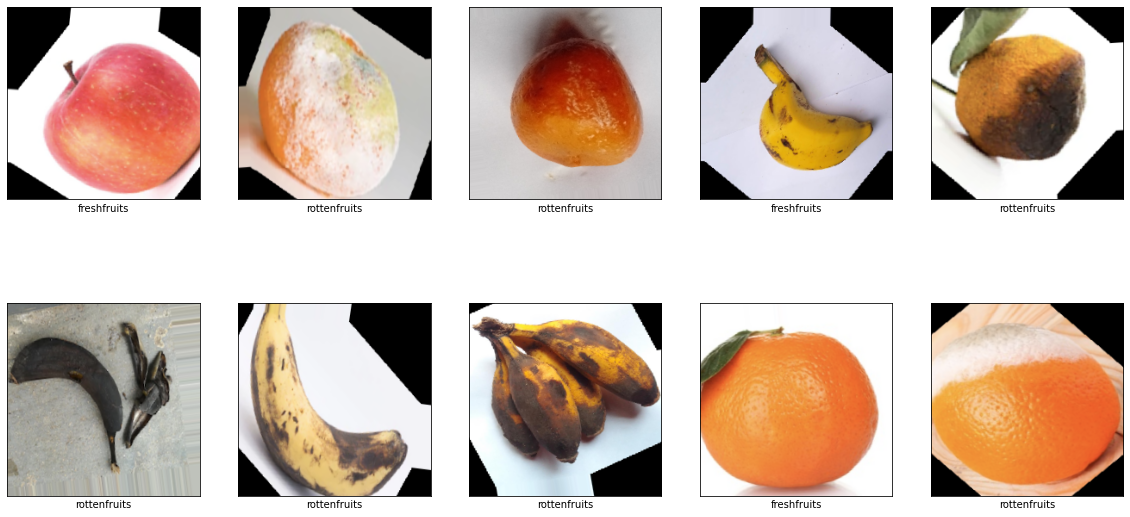

In [13]:
plot_images()

## Load ImageNet Base Model

In [14]:
# Load MobileNet V2 as the base model
base_model = keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

## Freeze the base model 

In [15]:
# Freeze base model so that all the pre-trained learning from the ImageNet dataset are retained in the initial training.
base_model.trainable = False

## Add layers to the model

In [16]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)

# Add global average pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer with one unit neuron for binary classification using sigmoid as the activation function
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)

In [17]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


## Compile the model

In [18]:
# use binary crossentropy for binary classification and assess the performance using accuracy as the metrics
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# use EarlyStopping in the case when val_accuracy reaches a plateau (not improving much)
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    restore_best_weights=True, 
    patience=2, 
    min_delta = 0.001)

# create model checkpoint callback to save the best model checkpoint
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="best_checkpoint",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training the model

In [20]:
# train the model for 10 iterations
history = model.fit(train_data,
          validation_data=valid_data,
          steps_per_epoch=train_data.samples/train_data.batch_size,
          validation_steps=valid_data.samples/valid_data.batch_size,
          epochs=10, callbacks=[es, model_checkpoint_callback])

Epoch 1/10
488/488 [==============================] - 475s 967ms/step - loss: 0.2010 - accuracy: 0.9269 - val_loss: 0.1484 - val_accuracy: 0.9495
Epoch 2/10
488/488 [==============================] - 418s 855ms/step - loss: 0.1109 - accuracy: 0.9616 - val_loss: 0.1239 - val_accuracy: 0.9576
Epoch 3/10
488/488 [==============================] - 350s 716ms/step - loss: 0.0903 - accuracy: 0.9688 - val_loss: 0.0940 - val_accuracy: 0.9681
Epoch 4/10
488/488 [==============================] - 351s 718ms/step - loss: 0.0754 - accuracy: 0.9741 - val_loss: 0.0877 - val_accuracy: 0.9689
Epoch 5/10
488/488 [==============================] - 350s 717ms/step - loss: 0.0712 - accuracy: 0.9758 - val_loss: 0.0872 - val_accuracy: 0.9692
Epoch 6/10
488/488 [==============================] - 351s 718ms/step - loss: 0.0639 - accuracy: 0.9791 - val_loss: 0.0905 - val_accuracy: 0.9681
Epoch 7/10
488/488 [==============================] - 350s 717ms/step - loss: 0.0616 - accuracy: 0.9784 - val_loss: 0.0740 -

## Evaluate the model

In [21]:
# evaluate the model
model.evaluate(valid_data, steps=valid_data.samples/valid_data.batch_size)

115/115 [==============================] - 45s 391ms/step - loss: 0.0692 - accuracy: 0.9757


[0.06920167803764343, 0.9756757020950317]

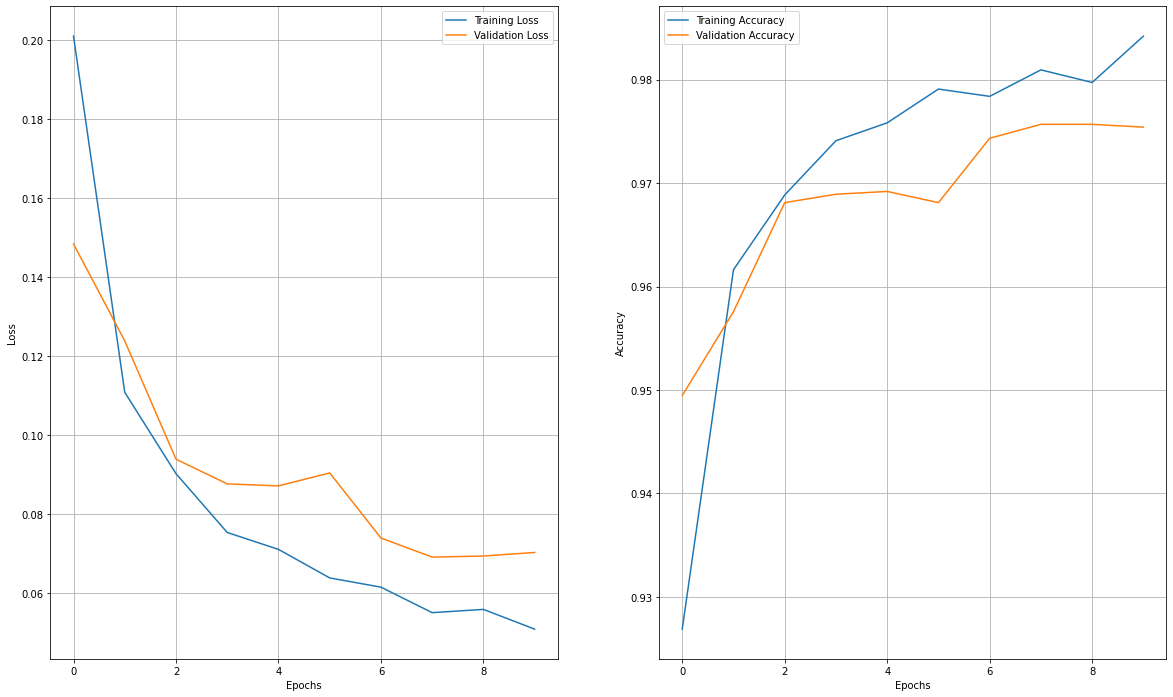

In [22]:
# plot the training/validation loss and the training/validation accuracy curves for comparison
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

## Load and test a new image

In [23]:
# define a function that takes in an image and display it
def show_test_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

## Preprocess the test image and perform predictions on it

In [24]:
# define a function that preprocess an image and perform predictions on it
def predictions(image_path):
    show_test_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [25]:
# define a function that states and classifies whether a fruit image is fresh or rotten based on its probability score
def is_fresh_or_rotten(image_path):
    preds = predictions(image_path)
    print(preds)
    if preds <= 0.5:
        print("It's Fresh and Edible!")
    else:
        print("It's Rotten and Inedible!")

## Sampling the test images

1/1 [==============================] - 1s 816ms/step
[[0.02883446]]
It's Fresh and Edible!


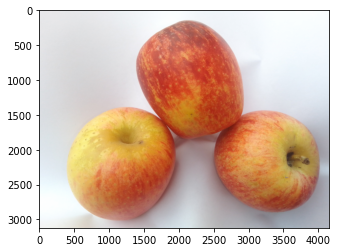

In [26]:
is_fresh_or_rotten('./dataset/test2/FreshApple (29).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.9992619]]
It's Rotten and Inedible!


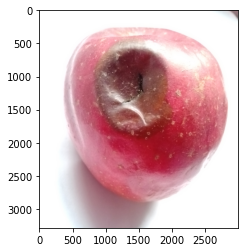

In [27]:
is_fresh_or_rotten('./dataset/test2/RottenApple (20).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.19978796]]
It's Fresh and Edible!


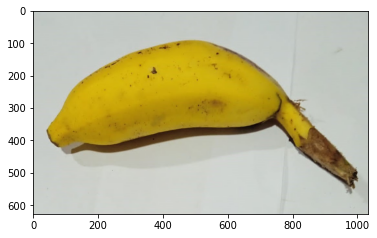

In [28]:
is_fresh_or_rotten('./dataset/test2/FreshBanana (65).jpg')

1/1 [==============================] - 0s 47ms/step
[[0.9842221]]
It's Rotten and Inedible!


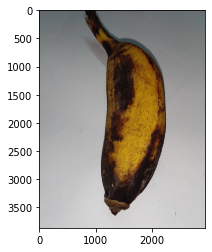

In [29]:
is_fresh_or_rotten('./dataset/test2/RottenBanana (121).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.46562007]]
It's Fresh and Edible!


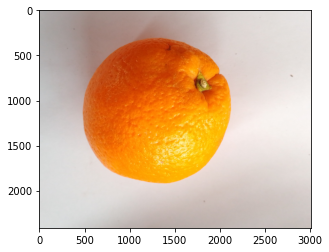

In [30]:
is_fresh_or_rotten('./dataset/test2/FreshOrange (173).jpg')

1/1 [==============================] - 0s 37ms/step
[[0.85882086]]
It's Rotten and Inedible!


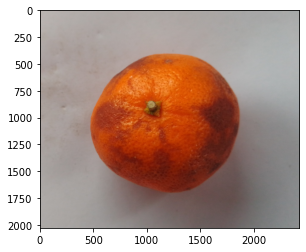

In [31]:
is_fresh_or_rotten('./dataset/test2/RottenOrange (60).jpg')

## Sampling images of previously untrained/unseen fruit categories

1/1 [==============================] - 0s 31ms/step
[[0.3168167]]
It's Fresh and Edible!


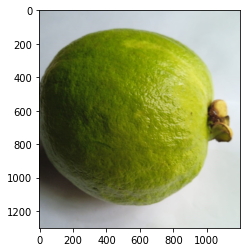

In [32]:
is_fresh_or_rotten('./dataset/test2/FreshGuava (7).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.999003]]
It's Rotten and Inedible!


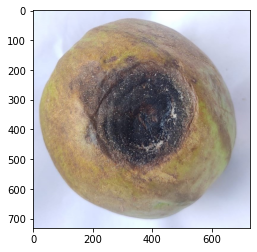

In [33]:
is_fresh_or_rotten('./dataset/test2/RottenGuava (134).jpg')

1/1 [==============================] - 0s 47ms/step
[[0.15724562]]
It's Fresh and Edible!


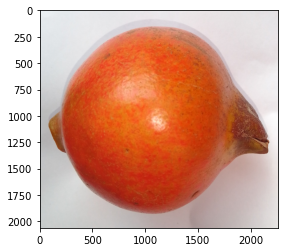

In [34]:
is_fresh_or_rotten('./dataset/test2/FreshPomegranate (12).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.9617524]]
It's Rotten and Inedible!


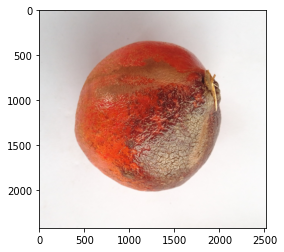

In [35]:
is_fresh_or_rotten('./dataset/test2/RottenPomegranate (18).jpg')

## Conclusion

Classification of the fruit images is mostly accurate for the pre-trained MobileNet V2 model, based on its low validation loss of 0.0692 and high validation accuracy of 0.9757 for 10 epochs. 

## End of Notebook